In [34]:
# Write your imports here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

In [35]:
n = 100
m = 10

X = np.random.randn(n, m)
a = np.random.randn(m)
b = np.random.randn()
noise = np.random.randn(n) * 0.5
y = X @ a + b + noise

df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(m)])
df['Target'] = y


print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.006650  -0.735943   0.513193  -2.922496   0.948868  -2.051849   
1   1.072426  -0.510432   1.239952   0.223930   0.940257   1.589500   
2   1.502268   0.629505   0.073119   1.774070  -1.558328  -0.754571   
3   0.768323   0.839716  -0.293118   0.688844  -1.810365  -1.512389   
4  -0.578157  -1.419936   0.363142  -1.637267   1.096612   1.035803   

   Feature_7  Feature_8  Feature_9  Feature_10    Target  
0  -1.775221   0.263086  -0.668035   -0.100374 -4.286676  
1  -0.342763   0.762492  -0.117488   -0.301130  0.208688  
2   0.999257   0.979136   0.793346    0.811884  0.359959  
3  -1.831979  -1.005778   0.310197    0.313911 -3.384031  
4  -0.756263  -0.873602   0.587444    0.552029  0.409556  


### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

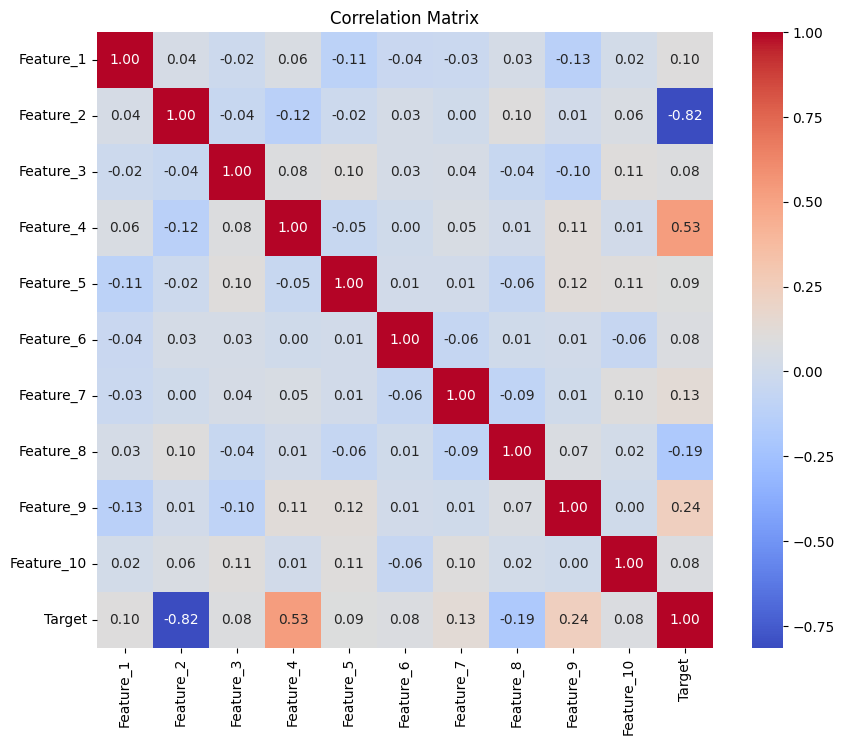

In [36]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

In [37]:
def linear_regression_model(X, coefficients):
    X_b = np.c_[np.ones(X.shape[0]), X]
    y_pred = X_b @ coefficients
    return y_pred

X = df.drop('Target', axis=1).values
y = df['Target'].values

X_b = np.c_[np.ones(X.shape[0]), X]

theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

bias = theta[0]
coefficients = theta[1:]

print("Bias:", bias)
print("Coefficients:", coefficients)

model_coefficients = np.concatenate(([bias], coefficients))

y_pred = linear_regression_model(X, model_coefficients)

print(y_pred[:5])

Bias: -1.5598620595158952
Coefficients: [ 0.42867048 -2.27800649  0.03053939  1.09530575  0.16655917  0.28071929
  0.26413609 -0.34210877  0.57476277  0.27764632]
[-4.88893917  0.44604771 -0.26552437 -2.99828859  0.70814578]


### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

In [38]:
def cost_function(X, y, coefficients):
    m = len(y)
    X_b = np.c_[np.ones(m), X]
    
    y_pred = X_b @ coefficients
    
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    
    return cost

def compute_gradients(X, y, coefficients):
    m = len(y)
    X_b = np.c_[np.ones(m), X]
    
    y_pred = X_b @ coefficients
    
    gradients = (1 / m) * X_b.T @ (y_pred - y)
    
    return gradients

X = df.drop('Target', axis=1).values
y = df['Target'].values

coefficients = np.zeros(X.shape[1] + 1)

cost = cost_function(X, y, coefficients)
print("Cost:", cost)

gradients = compute_gradients(X, y, coefficients)
print("Gradients:", gradients)


Cost: 4.6869266953775375
Gradients: [ 1.65002601 -0.2256274   1.7926312  -0.12206056 -1.38315348 -0.35375017
 -0.40811449 -0.50335182  0.54829242 -0.61550166 -0.11290021]


### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

Convergence reached at iteration 732
Final coefficients: [-1.55653765  0.42459147 -2.2658535   0.03022544  1.10129821  0.16873728
  0.28015232  0.26458262 -0.34393055  0.57164522  0.2746877 ]


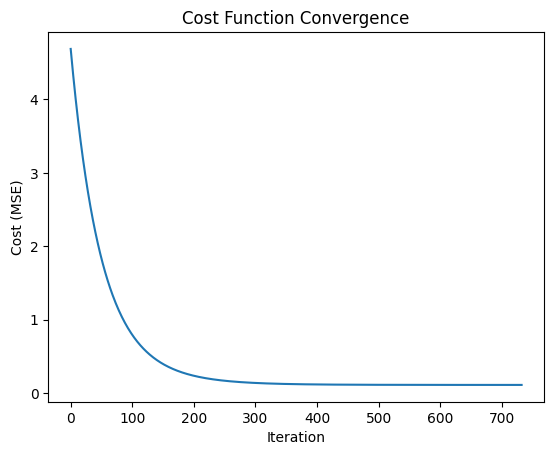

In [39]:
def gradient_descent(X, y, coefficients, learning_rate=0.01, num_iterations=1000, tolerance=1e-6):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        cost = cost_function(X, y, coefficients)
        cost_history.append(cost)

        gradients = compute_gradients(X, y, coefficients)

        coefficients = coefficients - learning_rate * gradients

        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Convergence reached at iteration {i}")
            break

    return coefficients, cost_history

X = df.drop('Target', axis=1).values
y = df['Target'].values

initial_coefficients = np.zeros(X.shape[1] + 1) 

final_coefficients, cost_history = gradient_descent(X, y, initial_coefficients, learning_rate=0.01, num_iterations=1000)

print("Final coefficients:", final_coefficients)

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()


### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

Convergence reached at iteration 771
Convergence reached at iteration 959
MAE - Final coefficients: [-1.5388      0.39884024 -2.2612737   0.06342545  1.08102002  0.18086012
  0.28219893  0.24899745 -0.34985288  0.50592644  0.30814586]
Huber - Final coefficients: [-1.55394754  0.41912888 -2.2735249   0.02843583  1.0974584   0.16109695
  0.2831788   0.25814152 -0.33625032  0.5671762   0.27386161]


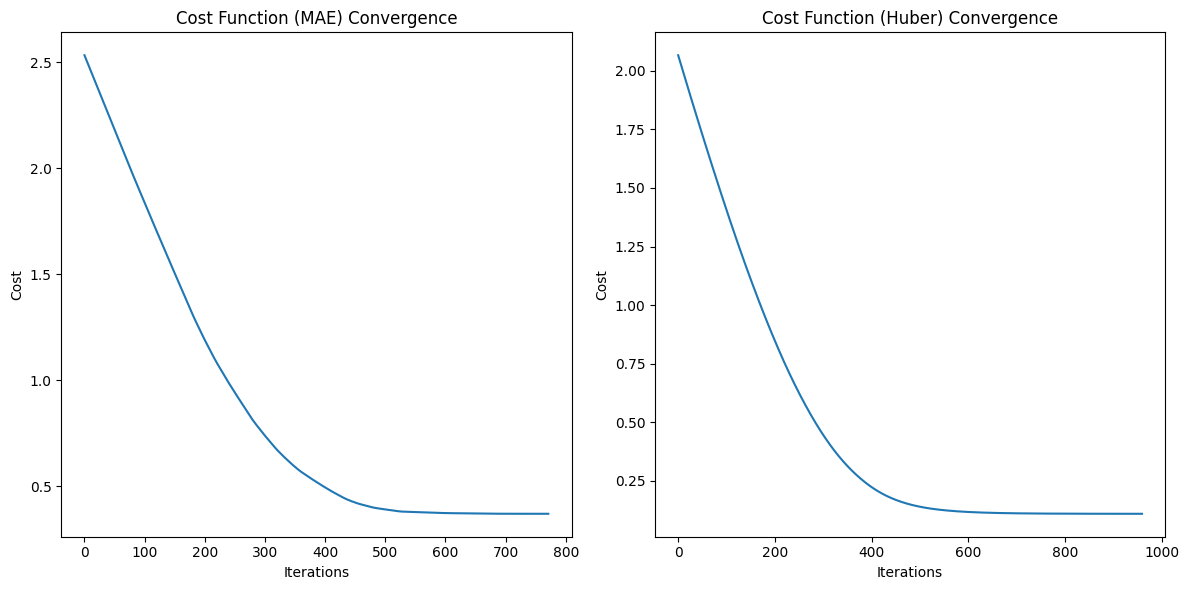

MAE training time: 0.0680 seconds
Huber training time: 0.1299 seconds


In [40]:
import time

def cost_function_mae(X, y, coefficients):
    m = len(y)
    X_b = np.c_[np.ones(m), X]
    y_pred = X_b @ coefficients
    cost = (1 / m) * np.sum(np.abs(y_pred - y))
    return cost

def compute_gradients_mae(X, y, coefficients):
    m = len(y)
    X_b = np.c_[np.ones(m), X]
    y_pred = X_b @ coefficients
    gradients = (1 / m) * X_b.T @ np.sign(y_pred - y)
    return gradients

def cost_function_huber(X, y, coefficients, delta=1.0):
    m = len(y)
    X_b = np.c_[np.ones(m), X]
    y_pred = X_b @ coefficients
    error = y_pred - y
    cost = np.sum(np.where(np.abs(error) <= delta, 
                           0.5 * error ** 2, 
                           delta * (np.abs(error) - 0.5 * delta))) / m
    return cost

def compute_gradients_huber(X, y, coefficients, delta=1.0):
    m = len(y)
    X_b = np.c_[np.ones(m), X]
    y_pred = X_b @ coefficients
    error = y_pred - y
    gradients = (1 / m) * X_b.T @ np.where(np.abs(error) <= delta, error, delta * np.sign(error))
    return gradients

def gradient_descent_custom(X, y, coefficients, cost_func, grad_func, learning_rate=0.01, num_iterations=1000, tolerance=1e-6, delta=1.0):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        if cost_func == cost_function_mae:
            cost = cost_func(X, y, coefficients)  # MAE does not need delta
        else:
            cost = cost_func(X, y, coefficients, delta)  # Huber loss requires delta
        cost_history.append(cost)

        if grad_func == compute_gradients_mae:
            gradients = grad_func(X, y, coefficients)  # MAE does not need delta
        else:
            gradients = grad_func(X, y, coefficients, delta)  # Huber loss requires delta

        coefficients = coefficients - learning_rate * gradients

        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Convergence reached at iteration {i}")
            break

    return coefficients, cost_history

X = df.drop('Target', axis=1).values
y = df['Target'].values

initial_coefficients = np.zeros(X.shape[1] + 1)

start_time = time.time()
final_coefficients_mae, cost_history_mae = gradient_descent_custom(X, y, initial_coefficients, cost_function_mae, compute_gradients_mae, learning_rate=0.01, num_iterations=1000)
mae_time = time.time() - start_time

start_time = time.time()
final_coefficients_huber, cost_history_huber = gradient_descent_custom(X, y, initial_coefficients, cost_function_huber, compute_gradients_huber, learning_rate=0.01, num_iterations=1000)
huber_time = time.time() - start_time

print("MAE - Final coefficients:", final_coefficients_mae)
print("Huber - Final coefficients:", final_coefficients_huber)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cost_history_mae)
plt.title("Cost Function (MAE) Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")

plt.subplot(1, 2, 2)
plt.plot(cost_history_huber)
plt.title("Cost Function (Huber) Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")

plt.tight_layout()
plt.show()

print(f"MAE training time: {mae_time:.4f} seconds")
print(f"Huber training time: {huber_time:.4f} seconds")

### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

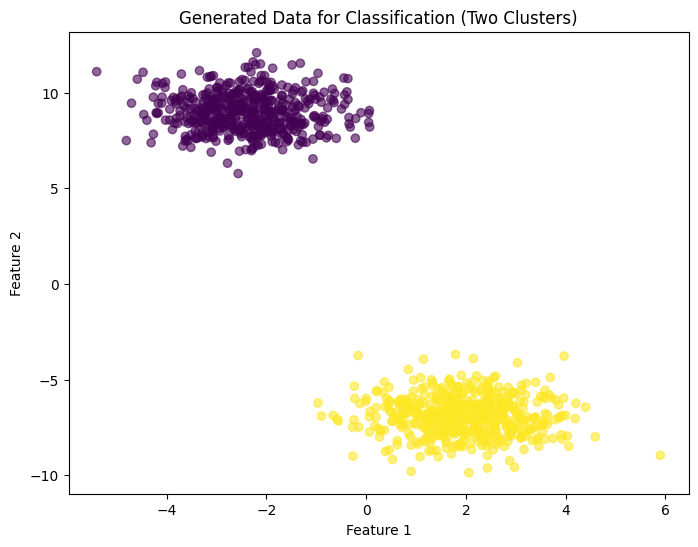

Shape of X_classification: (1000, 3)
Shape of y_classification: (1000,)


In [42]:
from sklearn.datasets import make_blobs

n_samples = 1000  
m_features = X.shape[1] 

X_classification, y_classification = make_blobs(n_samples=n_samples, 
                                                centers=2,  
                                                n_features=m_features,  
                                                random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_classification[:, 0], X_classification[:, 1], c=y_classification, cmap='viridis', alpha=0.6)
plt.title("Generated Data for Classification (Two Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print(f"Shape of X_classification: {X_classification.shape}")
print(f"Shape of y_classification: {y_classification.shape}")

### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1+\exp{(-\sum_{i=1}^{m}a_i x_i + b)}}$$. Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

Running experiment with learning rate: 1e-05
Training time: 0.1969 seconds

Running experiment with learning rate: 0.001
Training time: 0.1499 seconds

Running experiment with learning rate: 0.01
Training time: 0.1631 seconds

Running experiment with learning rate: 0.1
Convergence reached at iteration 325
Training time: 0.0505 seconds

Running experiment with learning rate: 1
Training time: 0.1836 seconds



C:\Users\sergelen.n\AppData\Local\Temp\ipykernel_2044\3378695671.py:11: RuntimeWarning: divide by zero encountered in log
  cost = - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\sergelen.n\AppData\Local\Temp\ipykernel_2044\3378695671.py:11: RuntimeWarning: invalid value encountered in multiply
  cost = - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


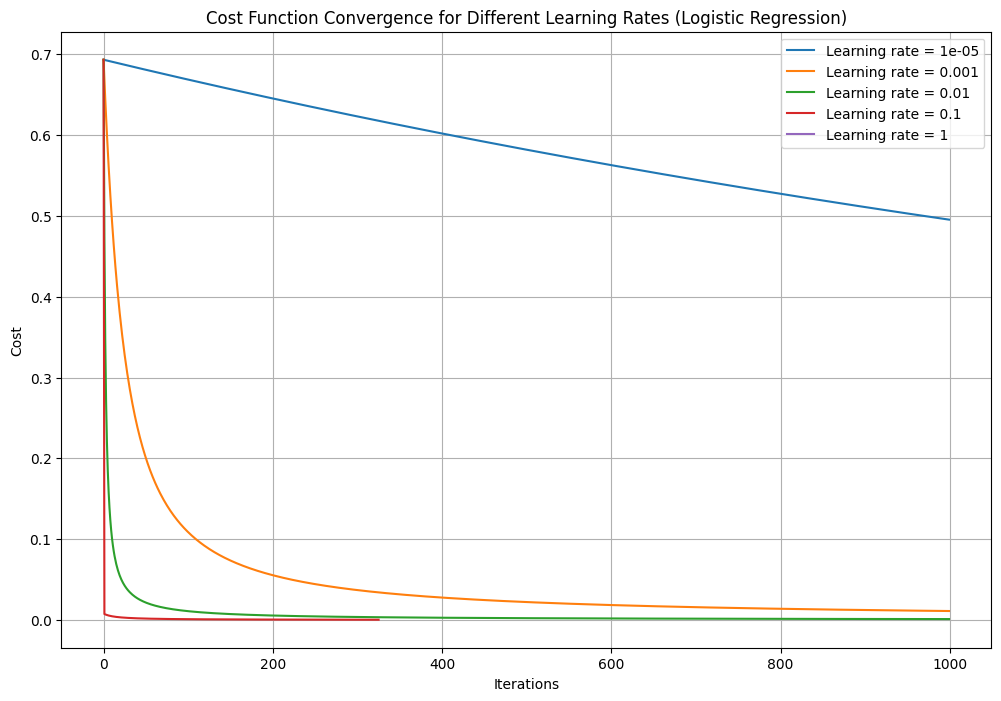

Final coefficients for learning rate 1e-05: 0.495319126276783
Final coefficients for learning rate 0.001: 0.011120218454814871
Final coefficients for learning rate 0.01: 0.0011471422768403745
Final coefficients for learning rate 0.1: 0.0003476454384197298
Final coefficients for learning rate 1: nan


In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_model(X, coefficients):
    X_b = np.c_[np.ones(X.shape[0]), X]
    return sigmoid(X_b @ coefficients)

def cost_function_cross_entropy(X, y, coefficients):
    m = len(y)
    y_pred = logistic_regression_model(X, coefficients)
    cost = - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

def compute_gradients_cross_entropy(X, y, coefficients):
    m = len(y)
    X_b = np.c_[np.ones(X.shape[0]), X]
    y_pred = logistic_regression_model(X, coefficients)
    gradients = (1 / m) * X_b.T @ (y_pred - y)
    return gradients

def gradient_descent_custom(X, y, coefficients, cost_func, grad_func, learning_rate=0.01, num_iterations=1000, tolerance=1e-6):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        cost = cost_func(X, y, coefficients)
        cost_history.append(cost)

        gradients = grad_func(X, y, coefficients)
        coefficients = coefficients - learning_rate * gradients

        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            print(f"Convergence reached at iteration {i}")
            break

    return coefficients, cost_history

learning_rates = [1e-5, 1e-3, 0.01, 0.1, 1]
cost_histories = []

X = X_classification
y = y_classification

initial_coefficients = np.zeros(X.shape[1] + 1)

for lr in learning_rates:
    print(f"Running experiment with learning rate: {lr}")
    start_time = time.time()
    final_coefficients, cost_history = gradient_descent_custom(X, y, initial_coefficients, cost_function_cross_entropy, compute_gradients_cross_entropy, learning_rate=lr, num_iterations=1000)
    cost_histories.append(cost_history)
    experiment_time = time.time() - start_time
    print(f"Training time: {experiment_time:.4f} seconds\n")

plt.figure(figsize=(12, 8))

for i, lr in enumerate(learning_rates):
    plt.plot(cost_histories[i], label=f"Learning rate = {lr}")

plt.title("Cost Function Convergence for Different Learning Rates (Logistic Regression)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

for lr, final_coefficients in zip(learning_rates, cost_histories):
    print(f"Final coefficients for learning rate {lr}: {final_coefficients[-1]}")

### * Problem 10. Continue experimenting and delving deep into ML
You just saw how modelling works and how to implement some code. Some of the things you can think about (and I recommend you pause and ponder on some of them are):
* Code: OOP can be your friend sometimes. `scikit-learn`'s models have `fit()`, `predict()` and `score()` methods.
* Data: What approaches work on non-generated data?
* Evaluation: How well do different models (and their "settings" - hyperparameters) actually work in practice? How do we evaluate a model in a meaningful way?
* Optimization - maths: Look at what `optimizers` (or solvers) are used in `scikit-learn` and why. Many "tricks" revolve around making the algorithm converge (finish) in fewer iterations, or making it more numerically stable.
* Optimization - code: Are there ways to make the code run fastr?